## Objetivo
Aplicar o algoritmo de regressão logística no dataset temperature.csv, e a partir disto, classificar valores inseridos pelo usuário em frio, confortável, quente e muito quente.

In [10]:
# Importando bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [2]:
# Leitura dos dados
df = pd.read_csv('temperature.csv')
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


## Implementando um classificador de padrões no Scikit-learn

In [3]:
# visualizando as primeiras linhas
df.head()

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel


In [4]:
df.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [5]:
# extração de x e y
x, y = df[['temperatura']].values, df[['classification']].values
print('x:\n', x)
print('y:\n', y)

x:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [6]:
# conversão de y para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y.ravel())
print('y:\n', y)

y:
 [3 2 3 3 0 1]


In [7]:
# Classificador
clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression()

In [11]:
# gerando 100 valores de temperatura
# linearmente espaçados entre 0 e 45
# predição em novos valores de temperatura
x_test = np.linspace(start=0., stop=45., num=100).reshape(-1, 1)

# predição desses valores
y_pred = clf.predict(x_test)

In [12]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [13]:
# conversão de y_pred para os valores originais
y_pred = le.inverse_transform(y_pred)

In [14]:
# output
output = {'new_temp': x_test.ravel(),
          'new_class': y_pred.ravel()}
output = pd.DataFrame(output)

In [15]:
output.head()

,new_temp,new_class
0,0.000000,frio
1,0.454545,frio
2,0.909091,frio
3,1.363636,frio
4,1.818182,frio


In [16]:
# estatisticas
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [17]:
# estatisticas
output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


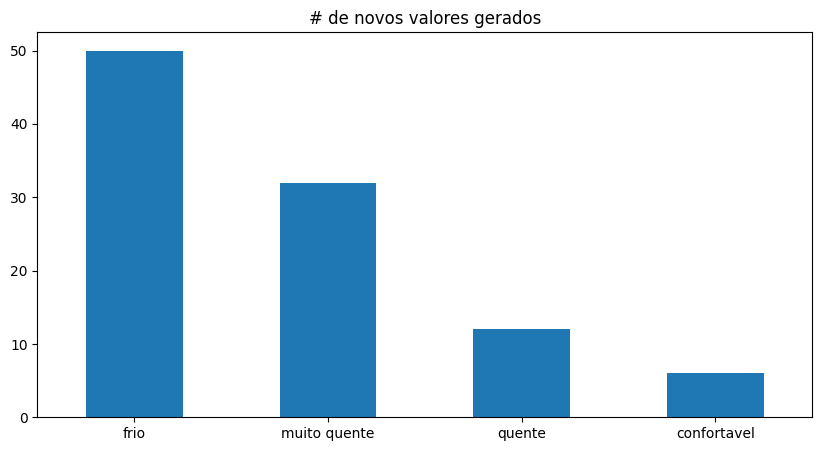

In [18]:
# contagem de valores gerados
output['new_class'].value_counts().plot.bar(figsize=(10, 5),
                                            rot=0,
                                            title='# de novos valores gerados');

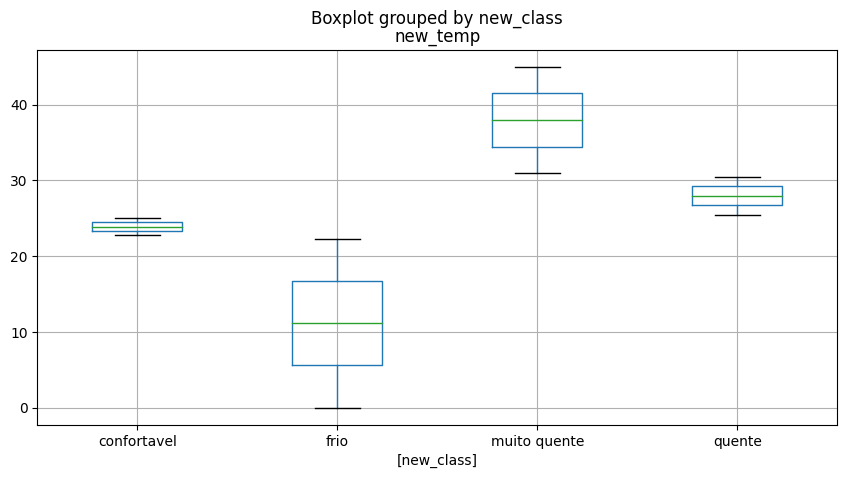

In [19]:
# distribuição do output produzido
# conseguimos inferir a classificação novas temperaturas
# a partir de um dataset com 6 exemplos
output.boxplot(by='new_class', figsize=(10, 5));

In [20]:
# sistema automático
def classify_temp():
  '''classifica o input do usuário'''

  ask = True
  while ask:
    # input de temperatura
    temp = input("Insira a temperatura (graus Celsius): ")

    # transformar para numpy array
    temp = np.array(float(temp)).reshape(-1, 1)

    # realiza classificação
    class_temp = clf.predict(temp)

    # transformação inversa para retornar a string original
    class_temp = le.inverse_transform(class_temp)

    # classificação
    print(f'A classificação da temperatura {temp.ravel()[0]} é: {class_temp[0]}')

    # perguntar
    ask = input("Nova classificação (y/n): ") == 'y'

In [21]:
# rodando programa
classify_temp()

Insira a temperatura (graus Celsius): 10
A classificação da temperatura 10.0 é: frio
Nova classificação (y/n): y
Insira a temperatura (graus Celsius): 20
A classificação da temperatura 20.0 é: frio
Nova classificação (y/n): y
Insira a temperatura (graus Celsius): 26
A classificação da temperatura 26.0 é: quente
Nova classificação (y/n): y
Insira a temperatura (graus Celsius): 24
A classificação da temperatura 24.0 é: confortavel
Nova classificação (y/n): y
Insira a temperatura (graus Celsius): 30
A classificação da temperatura 30.0 é: quente
Nova classificação (y/n): y
Insira a temperatura (graus Celsius): 36
A classificação da temperatura 36.0 é: muito quente
Nova classificação (y/n): n
